<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [17]:
!wget https://opendata.dwd.de/weather/nwp/icon-eu/grib/06/t/icon-eu_europe_regular-lat-lon_pressure-level_2019012406_048_500_T.grib2.bz2

--2019-01-24 12:51:37--  https://opendata.dwd.de/weather/nwp/icon-eu/grib/06/t/icon-eu_europe_regular-lat-lon_pressure-level_2019012406_048_500_T.grib2.bz2
Resolving opendata.dwd.de (opendata.dwd.de)... 141.38.2.22, 141.38.2.26
Connecting to opendata.dwd.de (opendata.dwd.de)|141.38.2.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 809270 (790K) [application/octet-stream]
Saving to: ‘icon-eu_europe_regular-lat-lon_pressure-level_2019012406_048_500_T.grib2.bz2’

icon-eu_europe_regu 100%[===================>] 790,30K  --.-KB/s    in 0,08s   

2019-01-24 12:51:37 (9,29 MB/s) - ‘icon-eu_europe_regular-lat-lon_pressure-level_2019012406_048_500_T.grib2.bz2’ saved [809270/809270]



In [6]:
!bzip2 -d cosmo-d2_germany_regular-lat-lon_model-level_2019012406_000_48_T.grib2.bz2

In [80]:
import xarray as xr
import cfgrib
import pandas as pd
import glob
import numpy as np
#from scipy.interpolate import griddata  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In [109]:
plt.rcParams.update({'font.size': 22})


In [129]:
infile = './icon-eu/icon-eu_europe_regular-lat-lon_time-invariant_2019012406_HSURF.grib2'
ds_hsurf = cfgrib.xarray_store.open_datasets(infile, \
                               backend_kwargs={'errors': 'ignore'})[0]
ds_hsurf

/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)


<xarray.Dataset>
Dimensions:     (latitude: 657, longitude: 1097)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    level       int64 ...
  * latitude    (latitude) float64 29.5 29.56 29.62 29.69 ... 70.38 70.44 70.5
  * longitude   (longitude) float64 -23.5 -23.44 -23.38 ... 44.88 44.94 45.0
    valid_time  datetime64[ns] ...
Data variables:
    h           (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    history:                 GRIB to CDM+CF via cfgrib-0.9.4.2/ecCodes-2.6.0 ...

In [139]:
z_half[1::]

<xarray.DataArray 'h' (generalVertical: 60, latitude: 657, longitude: 1097)>
array([[[2.156938e+04, 2.156938e+04, ..., 2.123900e+04, 2.124188e+04],
        [2.156938e+04, 2.156938e+04, ..., 2.123700e+04, 2.123912e+04],
        ...,
        [2.156588e+04, 2.156188e+04, ..., 2.156938e+04, 2.156938e+04],
        [2.154200e+04, 2.151000e+04, ..., 2.156938e+04, 2.156938e+04]],

       [[2.073111e+04, 2.073111e+04, ..., 2.040073e+04, 2.040361e+04],
        [2.073111e+04, 2.073111e+04, ..., 2.039873e+04, 2.040086e+04],
        ...,
        [2.072761e+04, 2.072361e+04, ..., 2.073111e+04, 2.073111e+04],
        [2.070373e+04, 2.067173e+04, ..., 2.073111e+04, 2.073111e+04]],

       ...,

       [[2.005194e+01, 2.005194e+01, ..., 2.005194e+01, 2.005194e+01],
        [2.005194e+01, 2.005194e+01, ..., 2.005194e+01, 1.992694e+01],
        ...,
        [2.017694e+01, 2.005194e+01, ..., 2.005194e+01, 2.005194e+01],
        [2.005194e+01, 1.992694e+01, ..., 2.005194e+01, 2.005194e+01]],

       [[0.00

In [140]:
z_half = ds_hhl['h']-ds_hsurf['h']
z = (z_half[:]+z_half[1:])/2.
z

<xarray.DataArray 'h' (generalVertical: 60, latitude: 657, longitude: 1097)>
array([[[2.156938e+04, 2.156938e+04, ..., 2.123900e+04, 2.124188e+04],
        [2.156938e+04, 2.156938e+04, ..., 2.123700e+04, 2.123912e+04],
        ...,
        [2.156588e+04, 2.156188e+04, ..., 2.156938e+04, 2.156938e+04],
        [2.154200e+04, 2.151000e+04, ..., 2.156938e+04, 2.156938e+04]],

       [[2.073111e+04, 2.073111e+04, ..., 2.040073e+04, 2.040361e+04],
        [2.073111e+04, 2.073111e+04, ..., 2.039873e+04, 2.040086e+04],
        ...,
        [2.072761e+04, 2.072361e+04, ..., 2.073111e+04, 2.073111e+04],
        [2.070373e+04, 2.067173e+04, ..., 2.073111e+04, 2.073111e+04]],

       ...,

       [[2.005194e+01, 2.005194e+01, ..., 2.005194e+01, 2.005194e+01],
        [2.005194e+01, 2.005194e+01, ..., 2.005194e+01, 1.992694e+01],
        ...,
        [2.017694e+01, 2.005194e+01, ..., 2.005194e+01, 2.005194e+01],
        [2.005194e+01, 1.992694e+01, ..., 2.005194e+01, 2.005194e+01]],

       [[0.00

In [97]:
infile = './icon-eu/icon-eu_europe_regular-lat-lon_time-invariant_2019012406_HHL.grib2'
ds_hhl = cfgrib.xarray_store.open_datasets(infile, \
                               backend_kwargs={'errors': 'ignore'})[0]
ds_hhl#.h[:,0,0]

/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)


<xarray.Dataset>
Dimensions:          (generalVertical: 61, latitude: 657, longitude: 1097)
Coordinates:
    time             datetime64[ns] ...
    step             timedelta64[ns] ...
  * generalVertical  (generalVertical) int64 1 2 3 4 5 6 7 ... 56 57 58 59 60 61
  * latitude         (latitude) float64 29.5 29.56 29.62 ... 70.38 70.44 70.5
  * longitude        (longitude) float64 -23.5 -23.44 -23.38 ... 44.94 45.0
    valid_time       datetime64[ns] ...
Data variables:
    h                (generalVertical, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    history:                 GRIB to CDM+CF via cfgrib-0.9.4.2/ecCodes-2.6.0 ...

In [136]:
infiles = glob.glob('./icon-eu/icon-eu_europe_regular-lat-lon_model-level_2019012406_050_*_QV.grib2')

In [118]:
ds = cfgrib.xarray_store.open_datasets(infiles[0], \
                           backend_kwargs={'errors': 'ignore'})[0]
ds

/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)


<xarray.Dataset>
Dimensions:               (latitude: 657, longitude: 1097)
Coordinates:
    time                  datetime64[ns] ...
    step                  timedelta64[ns] ...
    generalVerticalLayer  int64 ...
  * latitude              (latitude) float64 29.5 29.56 29.62 ... 70.44 70.5
  * longitude             (longitude) float64 -23.5 -23.44 -23.38 ... 44.94 45.0
    valid_time            datetime64[ns] ...
Data variables:
    q                     (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    history:                 GRIB to CDM+CF via cfgrib-0.9.4.2/ecCodes-2.6.0 ...

In [119]:
    ds_ls = []
    for infile in infiles:
        ds = cfgrib.xarray_store.open_datasets(infile, \
                               backend_kwargs={'errors': 'ignore'})[0]
        ds_ls.append(ds)

    ds_qv = xr.concat(ds_ls, dim='generalVerticalLayer').sortby('generalVerticalLayer')

/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

In [100]:
ds_hhl.generalVertical

<xarray.DataArray 'generalVertical' (generalVertical: 61)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61])
Coordinates:
    time             datetime64[ns] ...
    step             timedelta64[ns] ...
  * generalVertical  (generalVertical) int64 1 2 3 4 5 6 7 ... 56 57 58 59 60 61
    valid_time       datetime64[ns] ...

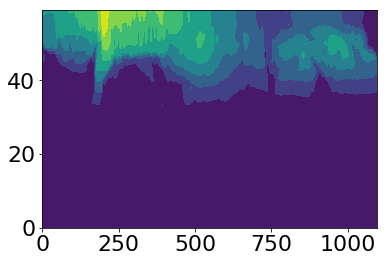

In [132]:
plt.contourf(ds_qv['q'].sel(latitude = 50).values)

In [147]:
ds_qv.longitude

<xarray.DataArray 'longitude' (longitude: 1097)>
array([-23.5   , -23.4375, -23.375 , ...,  44.875 ,  44.9375,  45.    ])
Coordinates:
    time        datetime64[ns] 2019-01-24T06:00:00
    step        timedelta64[ns] 2 days 02:00:00
  * longitude   (longitude) float64 -23.5 -23.44 -23.38 ... 44.88 44.94 45.0
    valid_time  datetime64[ns] 2019-01-26T08:00:00
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [146]:
z.sel(latitude = 50).shape, ds_qv['q'].sel(latitude = 50).shape, ds_qv.longitude.values[np.newaxis,:].shape

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [149]:
ds_qv.longitude

<xarray.DataArray 'longitude' (longitude: 1097)>
array([-23.5   , -23.4375, -23.375 , ...,  44.875 ,  44.9375,  45.    ])
Coordinates:
    time        datetime64[ns] 2019-01-24T06:00:00
    step        timedelta64[ns] 2 days 02:00:00
  * longitude   (longitude) float64 -23.5 -23.44 -23.38 ... 44.88 44.94 45.0
    valid_time  datetime64[ns] 2019-01-26T08:00:00
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [151]:
ds_qv.longitude.values.repeat(60).reshape((60, 1097)).shape

(60, 1097)

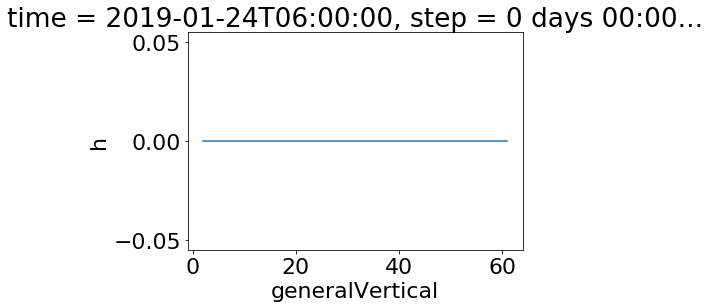

In [158]:
diff = z[:,0,0]-z[:,400,400]
diff.plot()

In [161]:
z[:,0,0]

<xarray.DataArray 'h' (generalVertical: 60)>
array([2.156938e+04, 2.073111e+04, 1.994284e+04, 1.920159e+04, 1.850454e+04,
       1.784908e+04, 1.723271e+04, 1.665311e+04, 1.610807e+04, 1.559555e+04,
       1.511359e+04, 1.466039e+04, 1.423421e+04, 1.382152e+04, 1.342152e+04,
       1.302152e+04, 1.262152e+04, 1.222153e+04, 1.182153e+04, 1.142153e+04,
       1.102153e+04, 1.062152e+04, 1.022153e+04, 9.821525e+03, 9.421524e+03,
       9.021524e+03, 8.621524e+03, 8.221528e+03, 7.821521e+03, 7.421521e+03,
       7.021524e+03, 6.621521e+03, 6.221528e+03, 5.821526e+03, 5.421518e+03,
       5.033746e+03, 4.659960e+03, 4.300113e+03, 3.954186e+03, 3.622080e+03,
       3.303809e+03, 2.999317e+03, 2.708640e+03, 2.431728e+03, 2.168595e+03,
       1.919329e+03, 1.683977e+03, 1.462573e+03, 1.255298e+03, 1.062241e+03,
       8.835403e+02, 7.195037e+02, 5.703586e+02, 4.365058e+02, 3.183480e+02,
       2.165117e+02, 1.318565e+02, 6.569846e+01, 2.005194e+01, 0.000000e+00],
      dtype=float32)
Coordinat

In [166]:
qv = ds_qv.rename({'generalVerticalLayer': 'height'})['q']*1000
qv['height'] = z[:,0,0].values
qv

<xarray.DataArray 'q' (height: 60, latitude: 657, longitude: 1097)>
array([[[2.461707e-03, 2.460892e-03, ..., 2.368953e-03, 2.371558e-03],
        [2.461714e-03, 2.460623e-03, ..., 2.369855e-03, 2.373005e-03],
        ...,
        [2.417542e-03, 2.417825e-03, ..., 2.407806e-03, 2.409676e-03],
        [2.417105e-03, 2.417382e-03, ..., 2.404249e-03, 2.405660e-03]],

       [[2.424796e-03, 2.424810e-03, ..., 2.288008e-03, 2.289943e-03],
        [2.424679e-03, 2.424563e-03, ..., 2.293923e-03, 2.295997e-03],
        ...,
        [2.401294e-03, 2.401215e-03, ..., 2.420154e-03, 2.420729e-03],
        [2.401236e-03, 2.401134e-03, ..., 2.418262e-03, 2.418793e-03]],

       ...,

       [[9.228103e+00, 9.185664e+00, ..., 8.295171e+00, 8.365266e+00],
        [9.230964e+00, 9.198539e+00, ..., 8.339755e+00, 8.420102e+00],
        ...,
        [9.475867e-01, 9.475867e-01, ..., 1.373879e+00, 1.361720e+00],
        [7.599513e-01, 7.649581e-01, ..., 1.401774e+00, 1.391045e+00]],

       [[9.452868e+00,

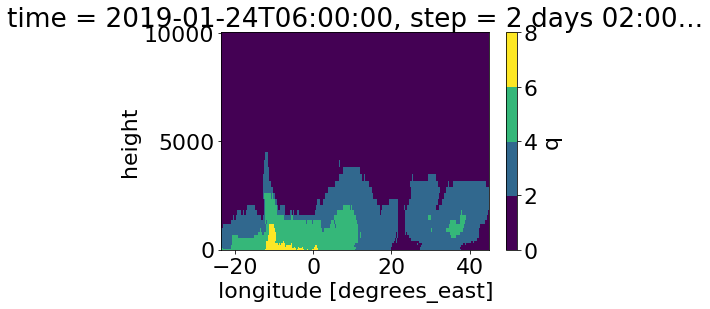

In [169]:
qv.sel(latitude = 50, height = slice(1e4, None)).plot(levels = 5)

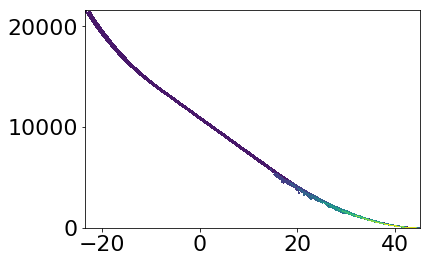

In [152]:
plt.contourf(ds_qv.longitude.values.repeat(60).reshape((60, 1097)), \
             z.sel(latitude = 50).values, \
             ds_qv['q'].sel(latitude = 50).values)

In [131]:
ds_qv['q'].sel(latitude = 50)#.plot()

<xarray.DataArray 'q' (generalVerticalLayer: 60, longitude: 1097)>
array([[2.425989e-06, 2.424636e-06, 2.423617e-06, ..., 2.448988e-06,
        2.451571e-06, 2.452968e-06],
       [2.457261e-06, 2.455602e-06, 2.453638e-06, ..., 2.441996e-06,
        2.441960e-06, 2.441923e-06],
       [2.427435e-06, 2.427581e-06, 2.428003e-06, ..., 2.422502e-06,
        2.422226e-06, 2.422037e-06],
       ...,
       [3.939073e-03, 3.937404e-03, 3.933113e-03, ..., 7.535626e-04,
        7.447411e-04, 7.361581e-04],
       [4.009835e-03, 4.008643e-03, 4.005067e-03, ..., 7.589976e-04,
        7.504146e-04, 7.420699e-04],
       [4.251766e-03, 4.252243e-03, 4.250098e-03, ..., 7.720474e-04,
        7.620338e-04, 7.522586e-04]], dtype=float32)
Coordinates:
    time                  datetime64[ns] 2019-01-24T06:00:00
    step                  timedelta64[ns] 2 days 02:00:00
    latitude              float64 50.0
  * longitude             (longitude) float64 -23.5 -23.44 -23.38 ... 44.94 45.0
    valid_time   

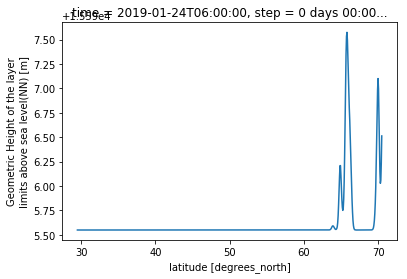

In [107]:
ds_hhl['h'][10,:,10].plot()

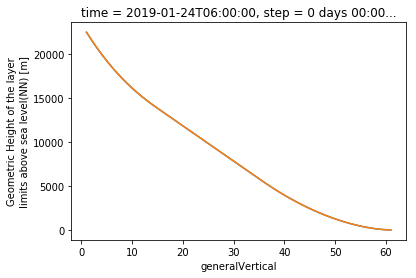

In [96]:
p = ds_hhl.h[:,1,1].plot()
ax = p[0].axes
ds_hhl.h[:,0,0].plot(ax = ax)

In [ ]:
ds_hhl.h[:,0,0].plot()

In [82]:
ds_ls2 = []
for i in range(40,60):
    print(i)    
    ds_ls = []
    infiles = glob.glob('./icon-eu/icon-eu_europe_regular-lat-lon_pressure-level_2019012406_{:03d}_*_T.grib2'.format(i))
    for infile in infiles:
        ds = cfgrib.xarray_store.open_datasets(infile, \
                               backend_kwargs={'errors': 'ignore'})[0]
        ds_ls.append(ds)

    ds_plev = xr.concat(ds_ls, dim='isobaricInhPa').sortby('isobaricInhPa')
    ds_plev = ds_plev.rename({'isobaricInhPa': 'plev'})
    ds_ls2.append(ds_plev)
    
ds_all = xr.concat(ds_ls2, dim = 'time')
ds_all['t'] = ds_all['t']-273.15
ds_all['t'].attrs['units'] = 'Celsius degrees'
ds_all['t'].attrs['long_name'] = 'temperature'
ds_all = ds_all.set_index({'time':'valid_time'})

40


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

41


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

42


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

43


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

44


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

45


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

46


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

47


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

48


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

49


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

50


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

51


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

52


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

53


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

54


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

55


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

56


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

57


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

58


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

59


/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: open_datasets is an experimental API, DO NOT RELY ON IT!
  warnings.warn("open_datasets is an experimental API, DO NOT RELY ON IT!", FutureWarning)
/usr/local/lib/python3.6/dist-packages/cfgrib/xarray_store.py:57: FutureWarning: ope

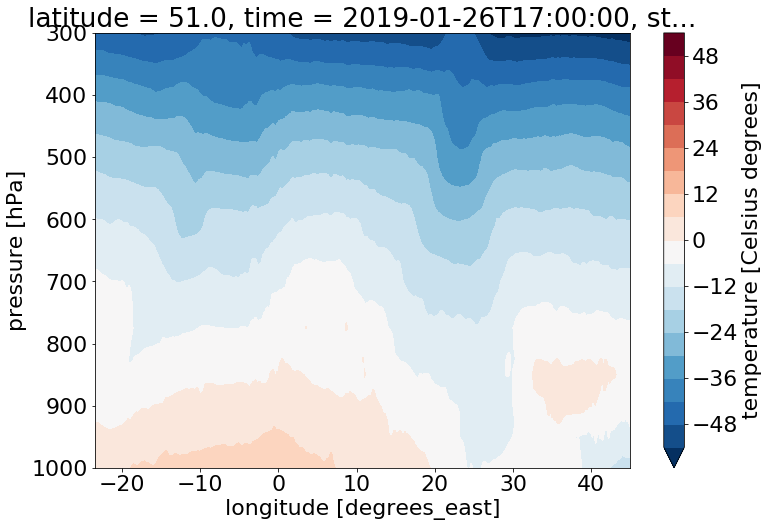

In [114]:
t_sel = ds_all['t'].isel(time=-1).sel(latitude = 51, \
                 plev = slice(300, None))
t_sel.plot.contourf(yincrease = False, size = 8, \
                    levels = 21, robust = True)
#plt.title(t_sel.valid_time.values)

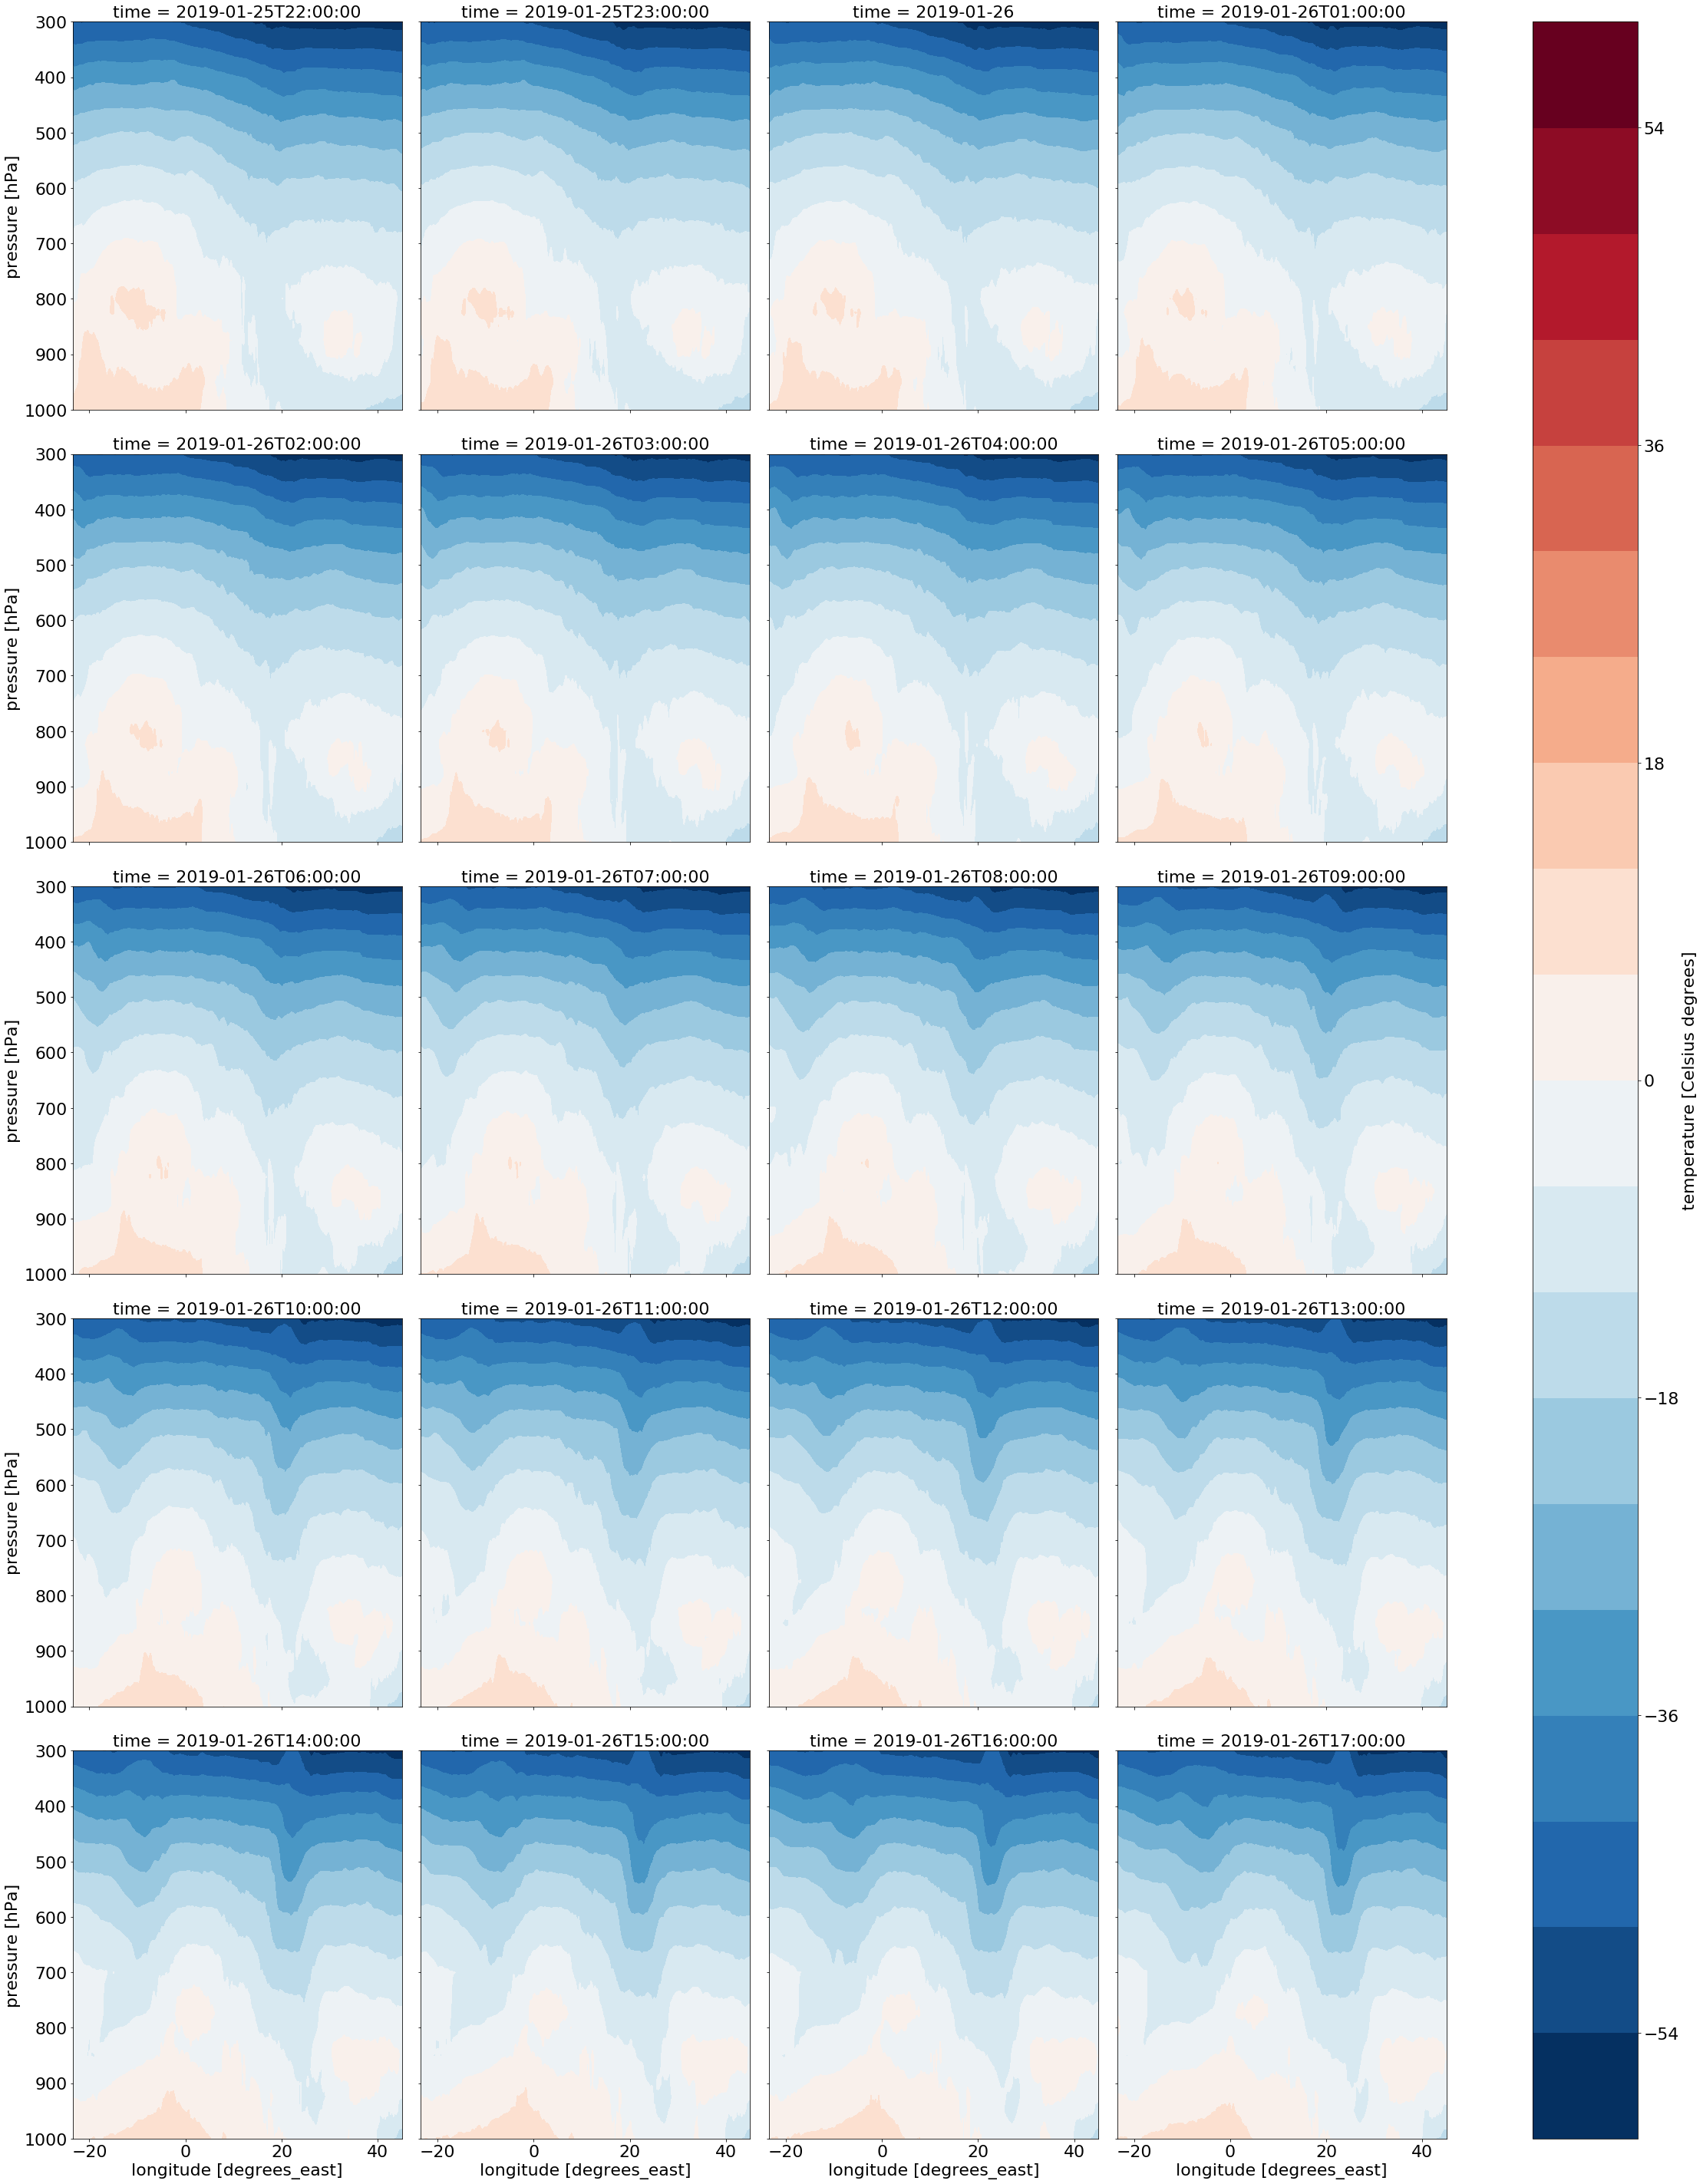

In [110]:
t_sel = ds_all['t'].sel(latitude = 50, \
                 plev = slice(300, None))
t_sel.plot.contourf(yincrease = False, size = 8, \
                    levels = 21, robust = True, \
                    col = 'time', col_wrap = 4)
#plt.title(t_sel.valid_time.values)

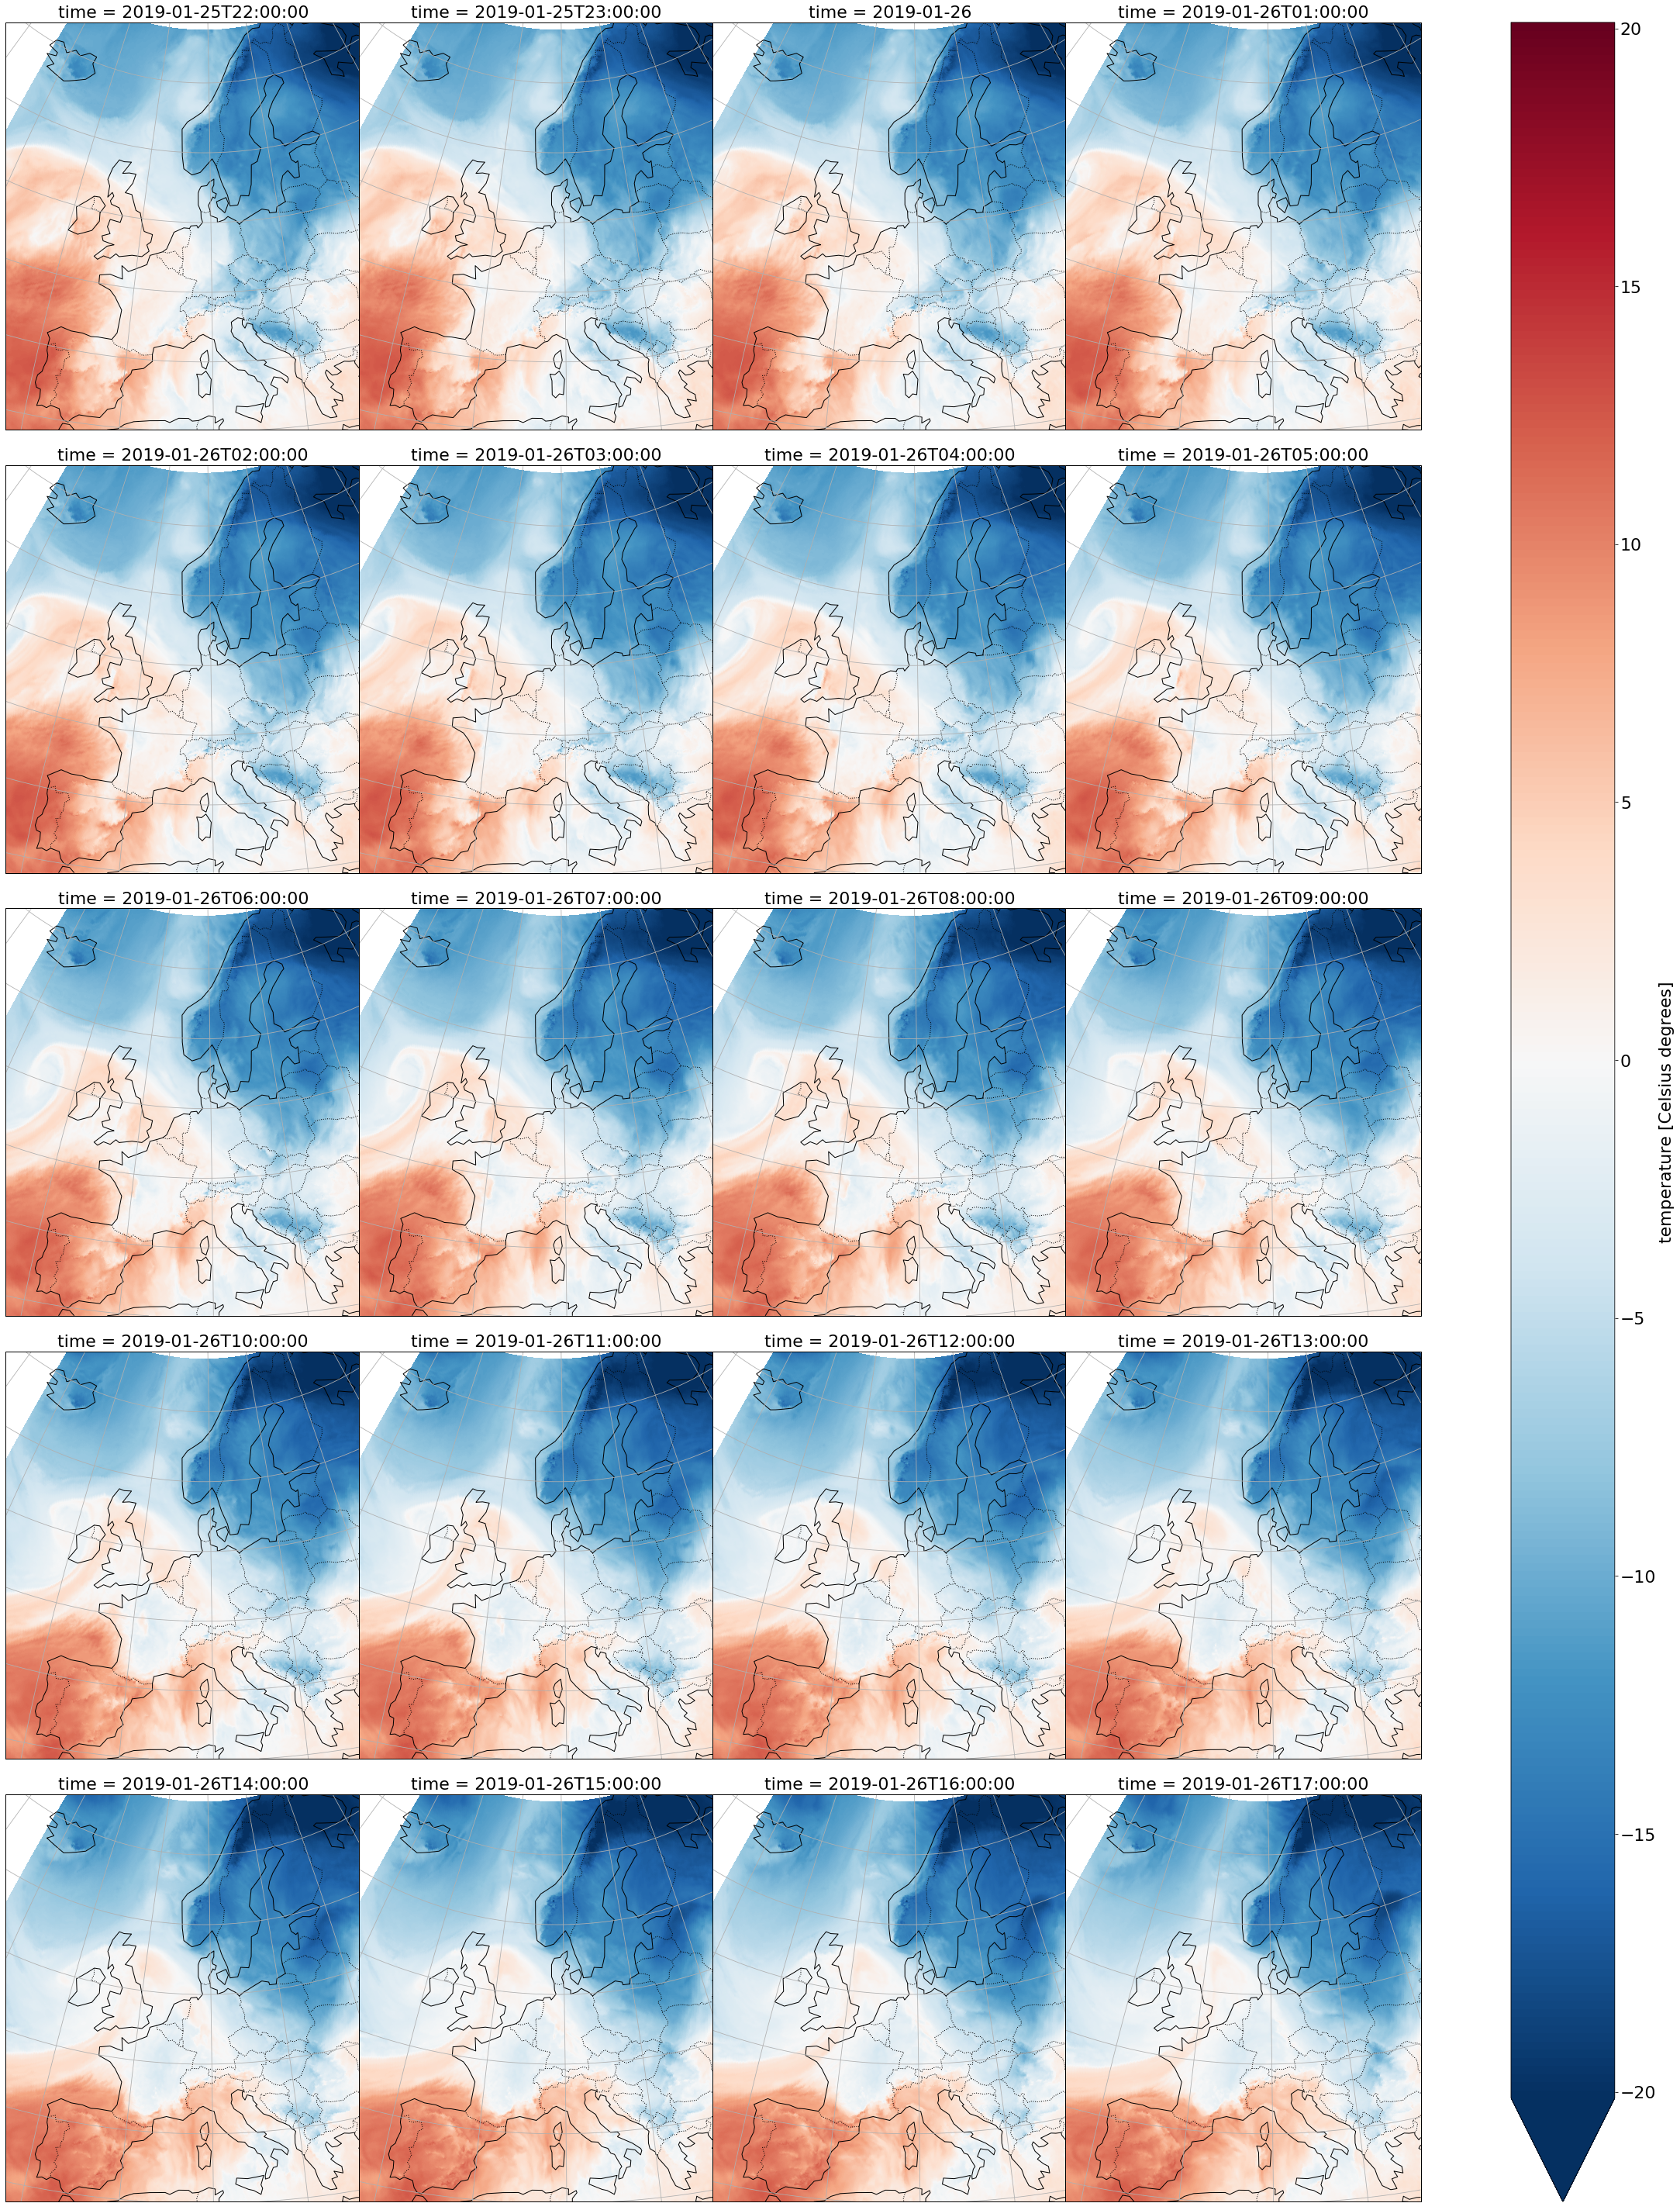

In [112]:
projection=ccrs.EuroPP()
p = ds_all['t'].sel(plev = 850).plot(transform=ccrs.PlateCarree(), col='time', \
                                 subplot_kws={'projection': projection}, \
                                 robust = True, col_wrap = 4, size = 8)
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')